Duvall Pinkney Taxi cab trip data homework 3

# Homework 3: assessing data and Seaborn scatterplots

While we have looked at the Green Taxi Trip data set before, we have never assessed the data following the 5 questions in the lab or removed missing data.

Recall that this data set is a record of all green taxi trips taken on Feb. 4, 2020.

Link: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb4_2020_Green_Taxi_Trip_Data.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb4_2020_Green_Taxi_Trip_Data.csv)

More information about the columns is given in [this Excel file](https://data.cityofnewyork.us/api/views/pkmi-4kfn/files/8e59a67b-a7eb-433f-8dca-d19766aaff87?download=true&filename=MD_TLC_GreenTripRecords2020.xlsx) 
which can also be downloaded from the [2020 Green Taxi Trip Data page](https://data.cityofnewyork.us/Transportation/2020-Green-Taxi-Trip-Data-January-June-/pkmi-4kfn).

### Question 0:  Load the data and reduce number of columns

Preliminary work to load the data and make it manageable for the rest of the assignment.
a) Run needed import statements.
b) Load the green taxi trip data from Feb. 3, 2020 into a DataFrame.
c) Create a new DataFrame only containing the columns:
* `lpep_pickup_datetime`
* `PULocationID`
* `passenger_count`
* `trip_distance`
* `total_amount` 
* `payment_type`.

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

### Question 1:  Assess the data

Answer the following questions about the reduced, 6 column taxi data.

a) What is the structure of the data?  What are the variable types for the columns? (refer to the second tab in the Excel file linked above for information about each column)

b) What is the granularity of the data?  That is, what does each row represent?  Is this the finest granularity possible?

c) What times are contained in the data?  What information do we have for each time?  Do you think the times are accurate?  Why or why not?

In [22]:
greencab_data = pd.read_csv("2020_Green_Taxi_Trip_Data__January_-_June_.csv")
greencab_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.00
1,2.0,01/01/2020 12:45:58 AM,01/01/2020 12:56:39 AM,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.00
2,2.0,01/01/2020 12:41:38 AM,01/01/2020 12:52:49 AM,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,NaN,0.3,15.34,1.0,1.0,0.00
3,1.0,01/01/2020 12:52:46 AM,01/01/2020 01:14:21 AM,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
4,1.0,01/01/2020 12:19:57 AM,01/01/2020 12:30:56 AM,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,NaN,0.3,11.30,1.0,1.0,0.00


In [35]:
greencab_filter = greencab_data[['lpep_pickup_datetime','PULocationID','passenger_count','trip_distance','total_amount','payment_type']]
greencab_filter.head()



,lpep_pickup_datetime,PULocationID,passenger_count,trip_distance,total_amount,payment_type
0,12/18/2019 03:52:30 PM,264,5.0,0.00,4.81,1.0
1,01/01/2020 12:45:58 AM,66,2.0,1.28,24.36,1.0
2,01/01/2020 12:41:38 AM,181,1.0,2.47,15.34,1.0
3,01/01/2020 12:52:46 AM,129,2.0,6.30,25.05,2.0
4,01/01/2020 12:19:57 AM,210,1.0,2.30,11.30,1.0


### Question 2:  Data faithfulness

We saw in a previous homework that some of the passenger_counts are missing.

a) Use `.describe()` to get information about all columns.  Which columns contain missing data?  Do you notice any other problems with the data?  (Hint: look at the minimum data values)

In [36]:
greencab_filter.describe()

,PULocationID,passenger_count,trip_distance,total_amount,payment_type
count,1.225889e+06,919964.000000,1.225889e+06,1.225889e+06,919964.000000
mean,1.078691e+02,1.294906,8.603955e+00,1.872079e+01,1.463758
std,7.088927e+01,0.946482,7.334294e+02,1.441417e+01,0.521599
min,1.000000e+00,0.000000,-3.369000e+01,-2.103000e+02,1.000000
25%,5.200000e+01,1.000000,1.080000e+00,8.800000e+00,1.000000
50%,8.200000e+01,1.000000,2.080000e+00,1.405000e+01,1.000000
75%,1.660000e+02,1.000000,4.490000e+00,2.408000e+01,2.000000
max,2.650000e+02,9.000000,1.693304e+05,7.538000e+02,5.000000


b) Remove all rows containing any missing data.  This should still leave us with over 10,000 trips.

Hint:  First use a filter to find all rows with at least one missing data value.  Then make a new DataFrame without those rows, using ~.

In [37]:
greencab_filter.isna().any(axis=1)

0          False
1          False
2          False
3          False
4          False
           ...  
1225884     True
1225885     True
1225886     True
1225887     True
1225888     True
Length: 1225889, dtype: bool

c) From the DataFrame created in part (b), create a new DataFrame containing only rows with 0 or a positive value in the `total_amount` column.  How many rows did you remove?  Do you think this step is justified?

We will use this final DataFrame for the rest of the lab.

In [40]:
greencab_data2 = greencab_filter['total_amount'] >= 0
greencab_data2.head()

0    True
1    True
2    True
3    True
4    True
Name: total_amount, dtype: bool

### Question 3:  Scatterplots

Using the DataFrame you obtained at the end of Question 2, use Seaborn to create a scatter plot of the trip distance (x axis) vs. the total amount (y axis), colored by the passenger count.  The style of points should correspond to the payment type.

As usual, your plot should have a title and axis labels.

What do you notice about your plot?  Do you see any more data that could indicate an error or problem with that data?  How informative is the plot?

Text(0.5, 1.0, 'Trip Distance vs Total Amount')

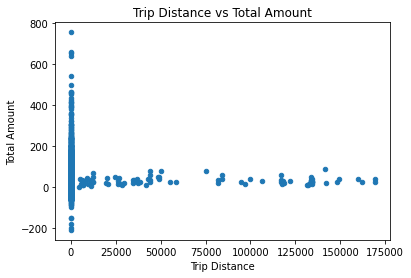

In [44]:

greencab_filter.plot.scatter(x = "trip_distance", y = "total_amount")
plt.xlabel("Trip Distance")
plt.ylabel("Total Amount")
plt.title("Trip Distance vs Total Amount")

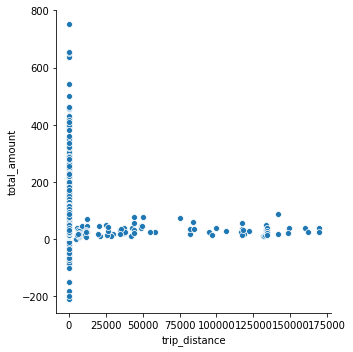

In [46]:

sns.relplot(x ="trip_distance", y = "total_amount", data = greencab_filter)

### Bonus Question
Plot an interesting scatterplot using some part of the pickup time for one (or more) of the variables.  What does your plot reveal about the data?

In [50]:
greencab_filter.plot.scatter(x = "lpep_pickup_datetime.dt", y = "total_amount")
plt.xlabel("Pickup Time")
plt.ylabel("Total Amount")
plt.title("Pickup Time vs Total Amount")

KeyError: 'lpep_pickup_datetime.dt'